In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from netgraph import Graph
from adjustText import adjust_text

In [3]:
df = pd.read_csv('../data/NBT20FRI-new.csv')
df

,Line,Dir,From Station,To Station
0,Bakerloo,NB,Elephant & Castle LU,Lambeth North
1,Bakerloo,NB,Lambeth North,Waterloo LU
2,Bakerloo,NB,Waterloo LU,Embankment
3,Bakerloo,NB,Embankment,Charing Cross LU
4,Bakerloo,NB,Charing Cross LU,Piccadilly Circus
...,...,...,...,...
1154,Victoria,SB,Pimlico,Vauxhall LU
1155,Victoria,SB,Vauxhall LU,Stockwell
1156,Victoria,SB,Stockwell,Brixton LU
1157,Waterloo & City,EB,Waterloo LU,Bank and Monument


In [4]:
df['Line'].unique()

array(['Bakerloo', 'Central', 'District', 'DLR', 'Elizabeth Line',
       'H&C and Circle', 'Jubilee', 'LO East London',
       'LO Gospel Oak-Barking', 'LO North London', 'LO Romford–Upminster',
       'LO Watford-Euston', 'LO West Anglia', 'London Trams',
       'Metropolitan', 'Northern', 'Piccadilly', 'Victoria',
       'Waterloo & City'], dtype=object)

In [7]:
df["From Station"].unique()

array(['Elephant & Castle LU', 'Lambeth North', 'Waterloo LU',
       'Embankment', 'Charing Cross LU', 'Piccadilly Circus',
       'Oxford Circus', "Regent's Park", 'Baker Street', 'Marylebone LU',
       'Edgware Road (Bak)', 'Paddington TfL', 'Warwick Avenue',
       'Maida Vale', 'Kilburn Park', "Queen's Park", 'Kensal Green',
       'Willesden Junction', 'Harlesden', 'Stonebridge Park',
       'Wembley Central', 'North Wembley', 'South Kenton', 'Kenton',
       'Harrow & Wealdstone', 'West Ruislip', 'Ruislip Gardens',
       'South Ruislip', 'Northolt', 'Greenford', 'Perivale',
       'Hanger Lane', 'Ealing Broadway', 'West Acton', 'North Acton',
       'East Acton', 'White City', "Shepherd's Bush LU", 'Holland Park',
       'Notting Hill Gate', 'Queensway', 'Lancaster Gate', 'Marble Arch',
       'Bond Street', 'Tottenham Court Road', 'Holborn', 'Chancery Lane',
       "St. Paul's", 'Bank and Monument', 'Liverpool Street LU',
       'Bethnal Green LU', 'Mile End', 'Stratford', 'L

In [8]:
def convert_to_overground(line):
    if line.startswith('LO '):
        return 'Overground'
    return line

In [10]:
# Function to remove suffixes from station names
def remove_suffix(station):
    suffixes = [' LU', ' LO', ' EL', ' NR', ' TfL', ' Trams', ' DLR']
    for suffix in suffixes:
        if station.endswith(suffix):
            return station[:-len(suffix)]
    return station

In [11]:
df['Line'] = df['Line'].apply(convert_to_overground)
df['From Station'] = df['From Station'].apply(remove_suffix)
df['To Station'] = df['To Station'].apply(remove_suffix)

In [70]:
df.to_csv('../data/dataset20.csv', sep=',', encoding='utf-8', index=False, header=True)

In [12]:
G = nx.Graph()

# Add edges to the graph
for _, row in df.iterrows():
    G.add_edge(row['From Station'], row['To Station'], line=row['Line'])

In [16]:
color_map = {
    'Bakerloo': 'brown',
    'Central': 'red',
    'District': 'green',
    'DLR': 'turquoise',
    'Elizabeth Line': 'purple',
    'H&C and Circle': 'yellow',
    'Jubilee': 'grey',
    'Metropolitan': 'magenta',
    'Northern': 'black',
    'Piccadilly': 'blue',
    'Victoria': 'lightblue',
    'Waterloo & City': 'cyan',
    'Overground': 'orange',
    'London Trams': 'lime'
}

edge_colors = [color_map.get(G[u][v]['line'], 'gray') for u, v in G.edges()]

In [45]:
def get_node_color(node):
    lines = set(G[node][neighbor]['line'] for neighbor in G[node])
    if len(lines) == 1:
        return color_map[list(lines)[0]]
    else:
        # If multiple lines, you could implement a priority system here
        # For now, we'll just take the first line's color
        return color_map[list(lines)[0]]

In [46]:
# Get colors for all nodes
node_colors = [get_node_color(node) for node in G.nodes()]

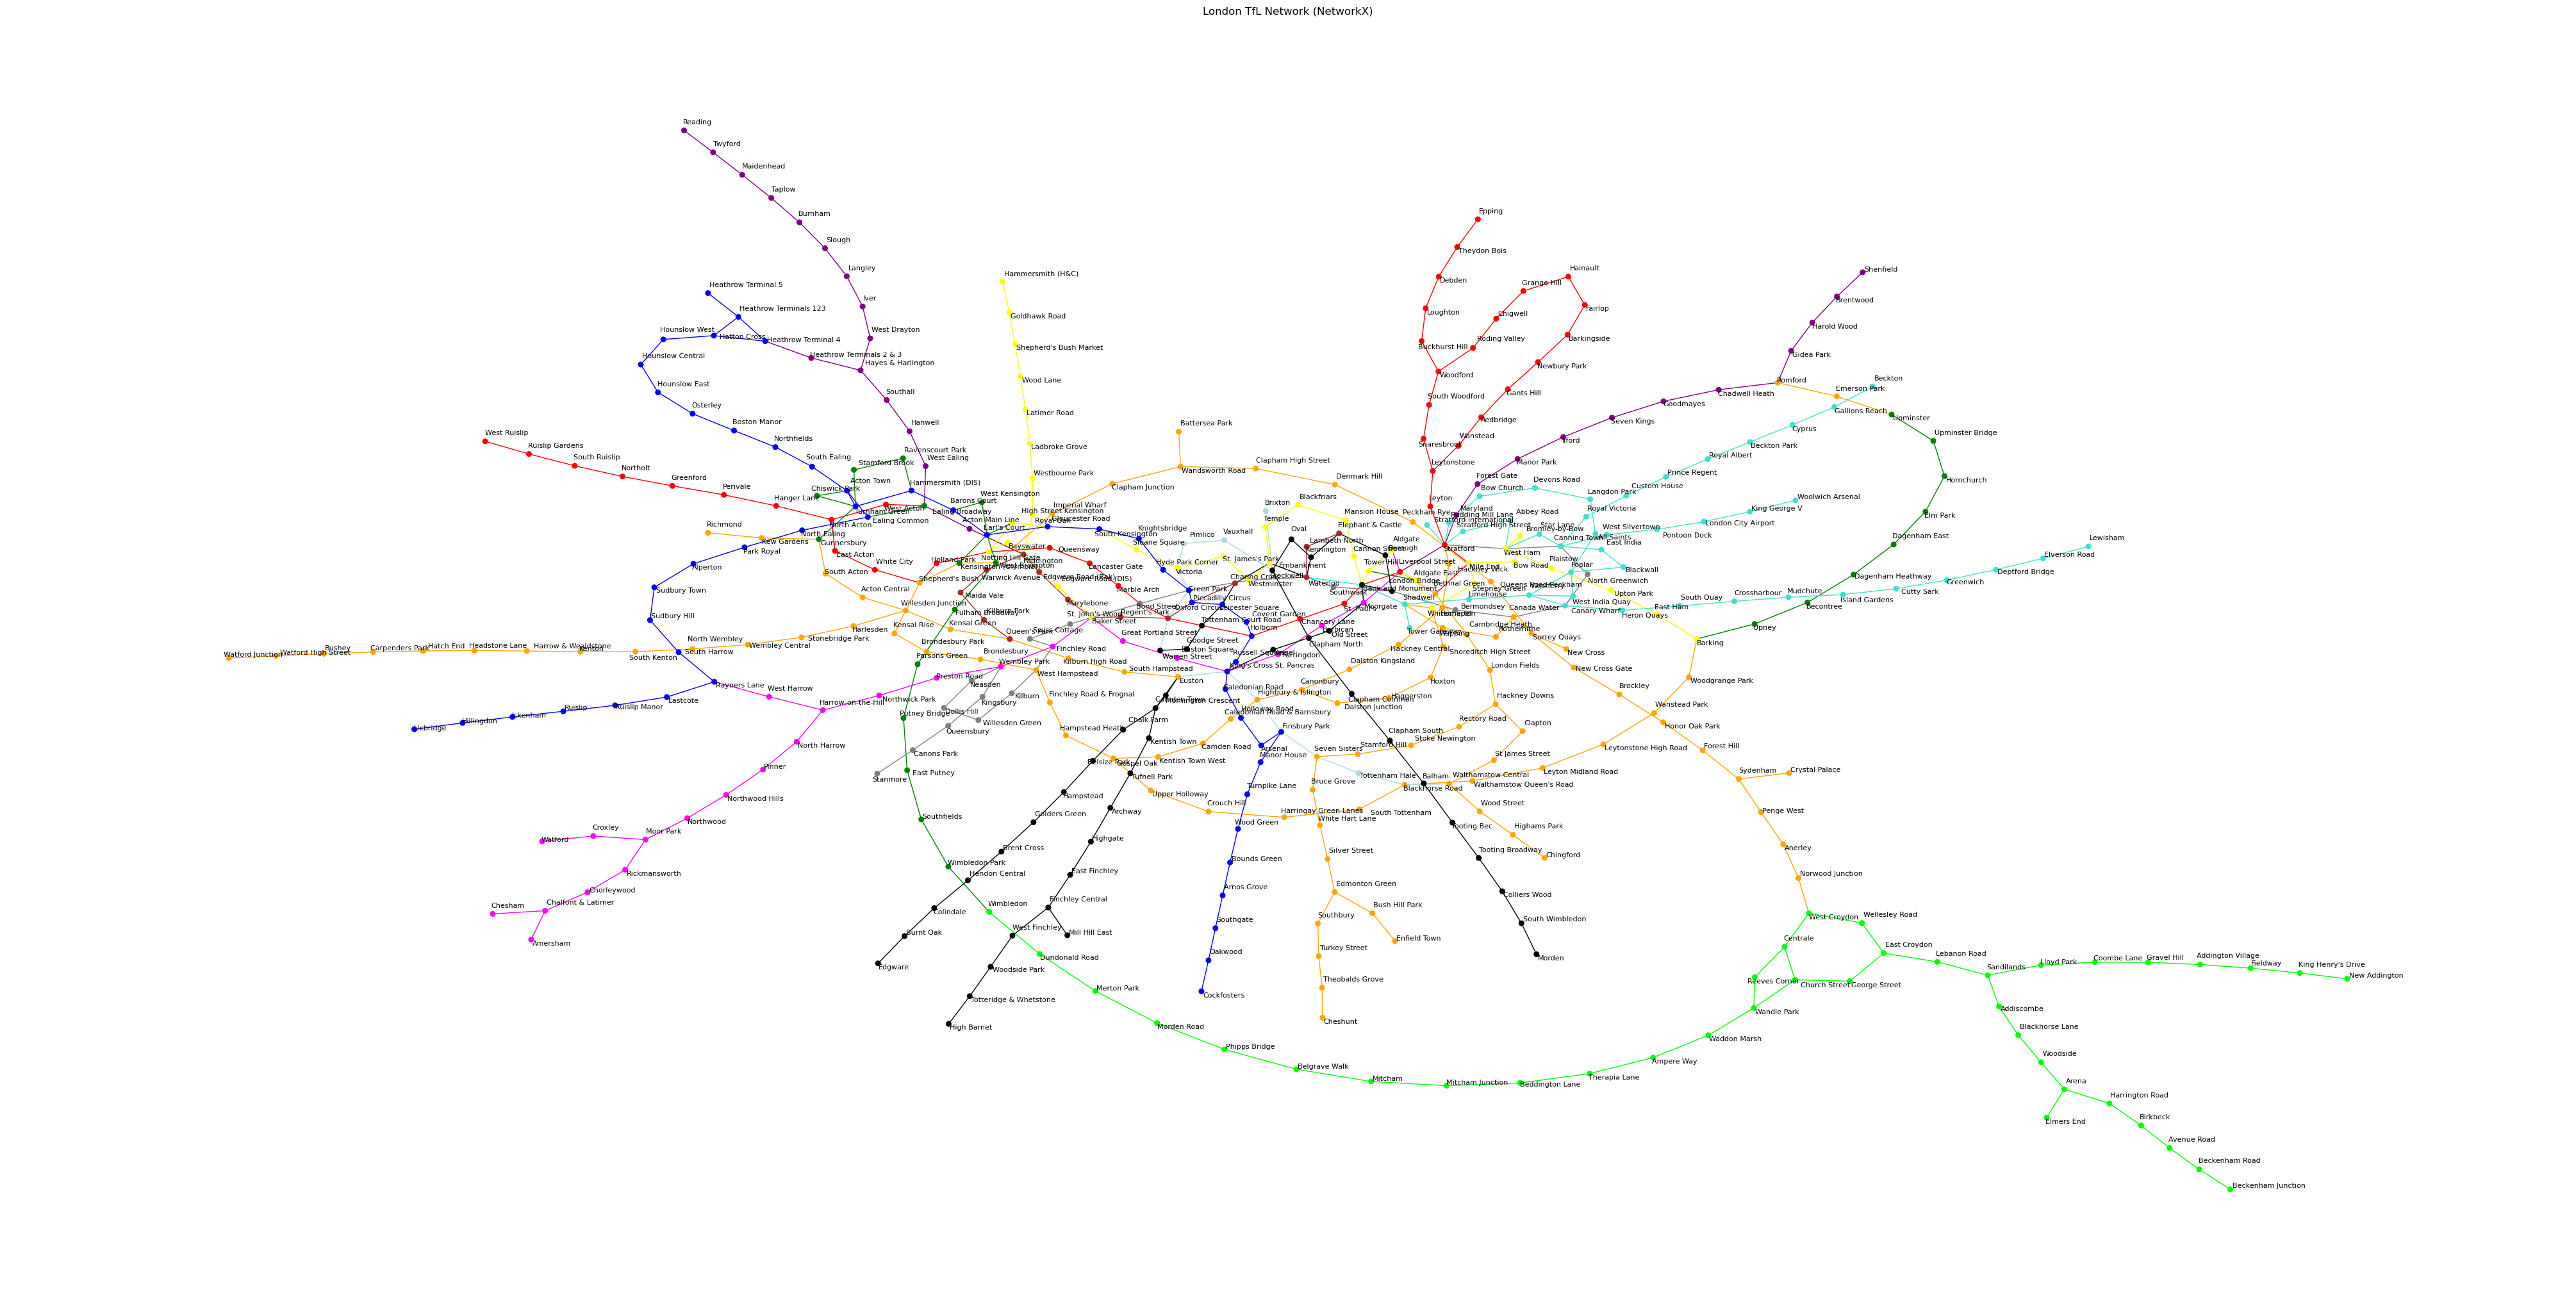

In [49]:
plt.figure(figsize=(40, 20))
pos = nx.kamada_kawai_layout(G)
pos = {node: (-x, y) for node, (x, y) in pos.items()}  # Mirror horizontally

nx.draw(G, pos, edge_color=edge_colors, node_size=30, node_color=node_colors, with_labels=False)

# Create texts for labels
texts = []
for node, (x, y) in pos.items():
    texts.append(plt.text(x, y, node, fontsize=8))

# Adjust label positions to reduce overlap
adjust_text(texts)

plt.title("London TfL Network (NetworkX)")
plt.axis('off')
plt.show()

/Users/biryani/anaconda3/lib/python3.11/site-packages/netgraph/_main.py:305: UserWarning: The border around the node Elephant & Castle is broader than its radius. The node will mostly have the color of the border (#2c404c), even though a different face color was specified (lightblue). To address this issue, reduce the value given for `node_edge_width`.
  warnings.warn(msg)
/Users/biryani/anaconda3/lib/python3.11/site-packages/netgraph/_main.py:305: UserWarning: The border around the node Lambeth North is broader than its radius. The node will mostly have the color of the border (#2c404c), even though a different face color was specified (lightblue). To address this issue, reduce the value given for `node_edge_width`.
  warnings.warn(msg)
/Users/biryani/anaconda3/lib/python3.11/site-packages/netgraph/_main.py:305: UserWarning: The border around the node Waterloo is broader than its radius. The node will mostly have the color of the border (#2c404c), even though a different face color wa

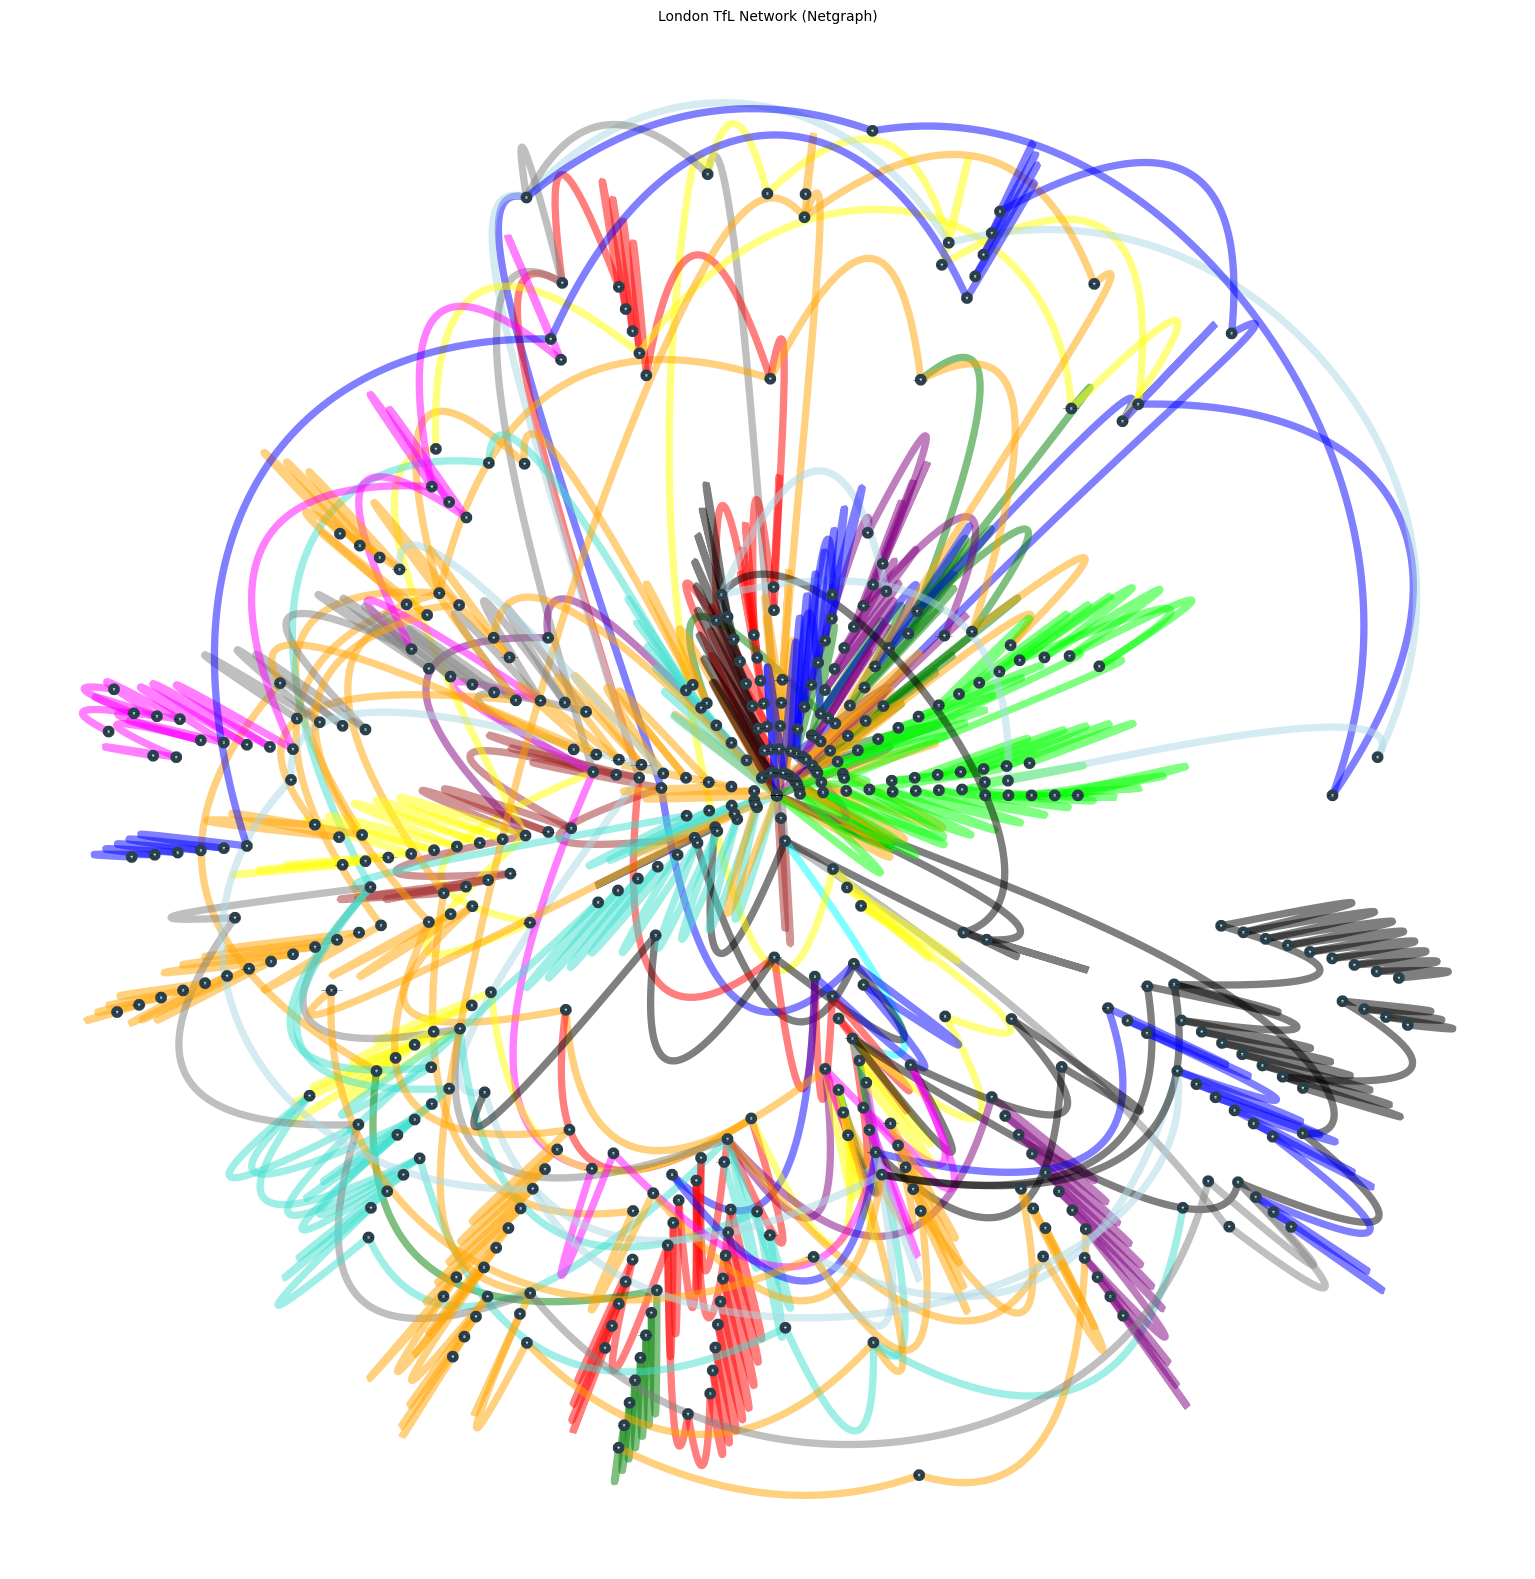

In [68]:
plt.figure(figsize=(40, 20))  # Adjusted for better visibility
edge_color_dict = {edge: color_map.get(G.edges[edge]['line'], 'gray') for edge in G.edges()}
Graph(G, 
      edge_color=edge_color_dict, 
      node_size=0.1,  # Increased node size
      node_color="lightblue",  # Changed node color for visibility
      edge_width=0.5,  # Increased edge width
      node_labels=True,  # Removed node labels for clarity
      edge_layout='curved',  # Added curved edges for better distinction
      node_layout='radial',  # Uses spring layout for node positioning
      )
plt.title("London TfL Network (Netgraph)", fontsize=10)
plt.axis('off')
plt.show()